# Flight Delays

## Imports and data

In [1]:
from altair import *

In [2]:
flights = load_dataset('flights-5k')

In [3]:
flights.head()

,date,delay,destination,distance,origin
0,2001-01-10 18:20:00,25,HOU,192,SAT
1,2001-01-31 16:45:00,17,OAK,371,SNA
2,2001-02-16 12:07:00,21,SAN,417,SJC
3,2001-02-03 17:00:00,-5,SAN,480,SMF
4,2001-01-02 12:16:00,5,PHX,833,OKC


In [4]:
len(flights)

5000

## Flight delays and distance

Create a visualization that explores the following question:

> Are longer/shorter flights more or less on time?

Keep in mind that there are 5000 observations here. To answer this question will likely require some sort of aggregation so draw out the correlations.

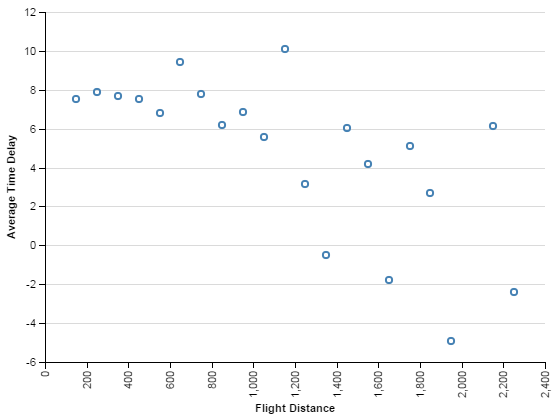

In [5]:
Chart(flights).mark_point().encode(
    X('distance:Q', bin=Bin(maxbins=40), title='Flight Distance'),
    Y('average(delay):Q', title='Average Time Delay')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

On average, there seems to be greater delay for shorter than longer flights. This may be because pilots are able to compensate during with increased flight speed for delayed takeoffs. It could also be that longer flights have a more rigorous schedule.

## Delays over time

Create a visualization that explores the following question:

> How do average flight delays vary with the day of the week in this dataset?

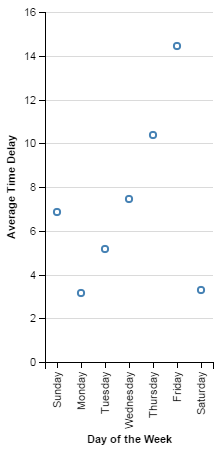

In [6]:
Chart(flights).mark_point().encode(
    X('date:T', timeUnit='day', title='Day of the Week'),
    Y('average(delay):Q', title='Average Time Delay')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

On average, Thursday and Friday flights are most likely to be delayed. Monday and Saturday flights are the least likely to be delayed. This may be because more people tend to travel with the intention of arriving for the weekend or for the week.

## Delays by origin and destination

Create a visualization that allows explores the following question:

> Which airports (both origin and detination) have the best and worst average delays?

In creating this visualiztion, there are three variables you need to look at. This means you will need to use at least three encoding channels. Finding the right encoding channels and marks is the challenge here!

In [ ]:
Chart(flights, width=800, height=800, config=Config(axis=AxisConfig(grid=True))).mark_bar().encode(
    Y('origin', title='Origin', sort=SortField(field='delay', op='sum', order='ascending')),
    X('destination', title='Destination', sort=SortField(field='delay', op='sum', order='ascending')),
    Color('average(delay):Q', scale=Scale(range=['yellow', 'purple']))
    #Y('average(delay):Q', title='Average Time Delay')
)

In the following markdown cell discuss conclusions from this visualization in complete sentences:

The worst delays originate out of LAS, MDW, TPA and arrive in MSY, FLL, STL (respectively). However, PHX to BUF, BUF to LAS, SLC to HOU on average tend to arrive earlier than scheduled.